# Work Shop Keras Titanic

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

In [2]:
train=pd.read_csv("train_titanic.csv")
X=train.drop(["Survived","Name","Sex","Ticket","Cabin","Embarked"],axis=1)
X["Pclass"]=X["Pclass"].fillna(5)
X["Age"]=X["Age"].fillna(X["Age"].mean())
X["Fare"]=X["Fare"].fillna(X["Fare"].mean())
y=train["Survived"]


In [3]:
X= StandardScaler().fit_transform(X)
y= StandardScaler().fit_transform(y.values.reshape(-1, 1))

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, random_state=5)

# Création du réseau de neurones(modèle séquentiel) composé de 3 couches

In [5]:
model=Sequential([
    Dense(units=6, activation="relu",input_dim=6,name="model_hidden1"), #units=nbr de variables d'entrées
    Dense(activation="relu",units=300,kernel_initializer="he_uniform",name="model_hidden2"), #units=nbr de neurones
    Dense(activation="relu",units=200,kernel_initializer="he_uniform",name="model_hidden2_1"),
    Dense(activation="tanh",units=1,kernel_initializer="he_uniform",name="model_hidden3") #couche de sortie
])


In [6]:
from tensorflow.keras.optimizers import SGD
from keras import losses 
from keras import optimizers 
from keras import metrics 

In [7]:
# loss = "mean_squared_logarithmic_error","mean_absolute_error","mean_squared_error","sparse_categorical_crossentropy"
#"binary_crossentropy"(ideal pour binaire)
opt=SGD(learning_rate = 0.01, momentum = 0.9, nesterov = True)

model.compile(loss="mean_squared_error",
              optimizer=opt,               
              metrics=["accuracy"]
              )

In [8]:
#training model
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=30)

Epoch 1/50
27/27 [==============================] - 1s 7ms/step - loss: 1.0434 - accuracy: 0.0000e+00 - val_loss: 0.9940 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9008 - accuracy: 0.0000e+00 - val_loss: 0.9470 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.0000e+00 - val_loss: 0.8902 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.0000e+00 - val_loss: 0.9534 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.7980 - accuracy: 0.0000e+00 - val_loss: 0.9214 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.0000e+00 - val_loss: 0.8898 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.7715 - accuracy: 0.0000e+00 - val_loss

In [9]:
#evaluate the model
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)
print(f"Train ; {train_acc}, Test: {test_acc}")

3/3 [==============================] - 0s 2ms/step - loss: 0.9568 - accuracy: 0.0000e+00
Train ; 0.0, Test: 0.0


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Courbe d'apprentissage

In [11]:
import matplotlib.pyplot as plt

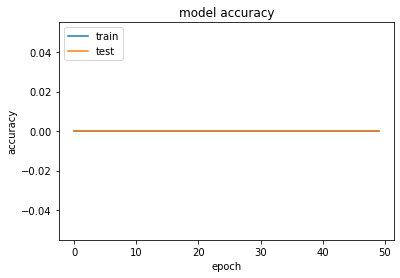

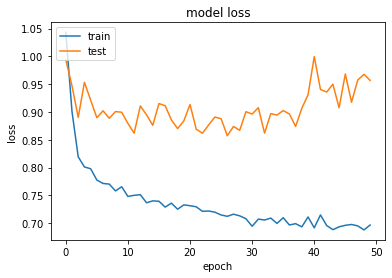

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
